# **Predictive Modeling of Vehicle Fuel Efficiency Using Multiple Linear and Ridge Regression**

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import Ridge, Lasso

In [2]:
df = pd.read_csv(r"C:\Users\Sangeeth N\Downloads\fuel_economy_data.csv.csv")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [3]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [7]:
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [8]:
df['horsepower'] = pd.to_numeric(df['horsepower'].str.replace('?','0',case=False)) 

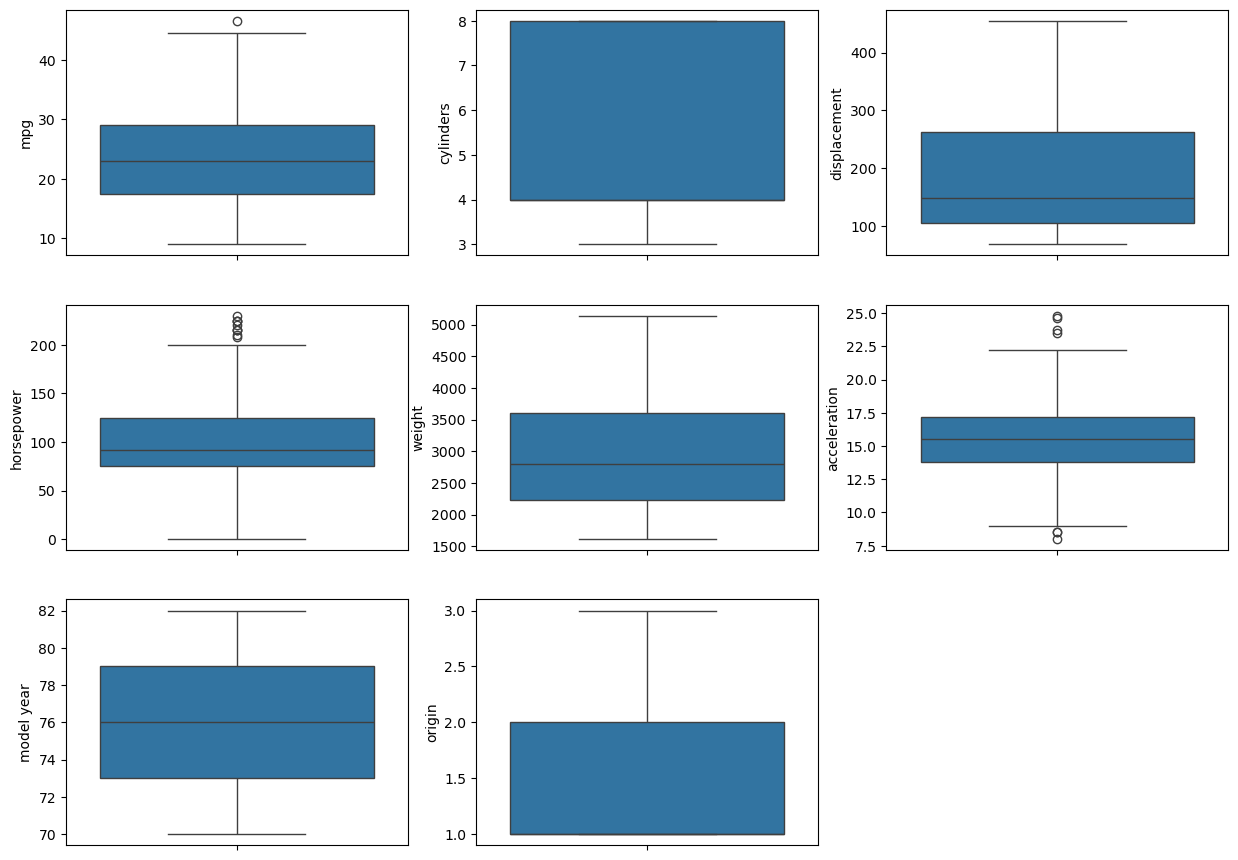

In [9]:
numerical_data = df.select_dtypes(include=['int', 'float'])
plt.figure(figsize=(15,30))
for i in range(len(numerical_data.columns)):
    plt.subplot(8, 3, i +1)
    sns.boxplot(y = numerical_data.columns[i], data = df)
plt.show()

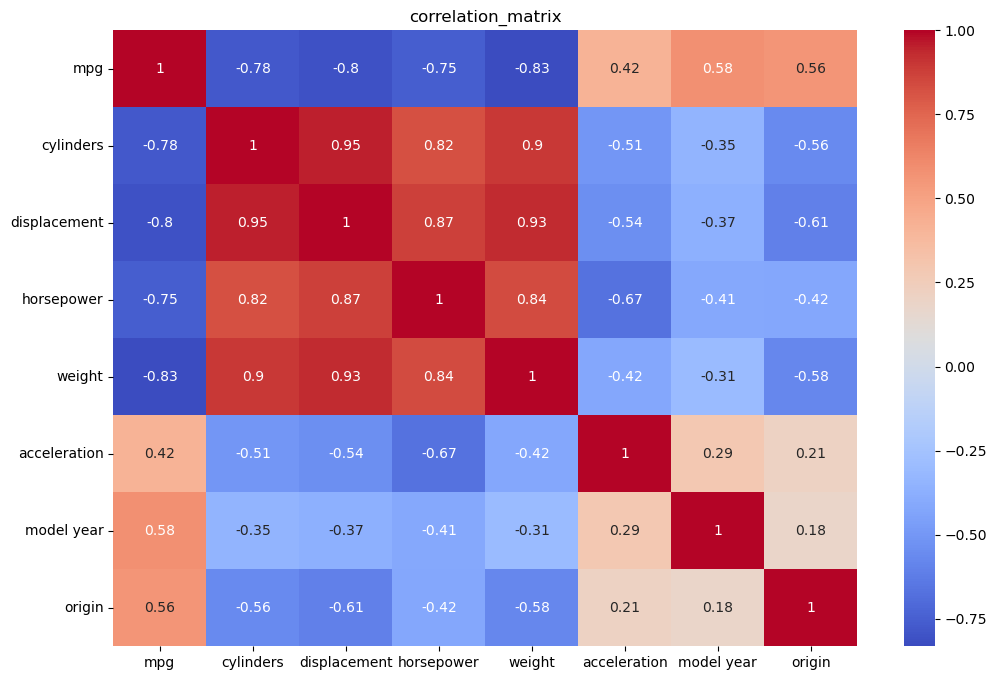

In [10]:
correlation_matrix = numerical_data.corr()
plt.figure(figsize = (12,8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.title('correlation_matrix')
plt.show()

## #Model 01

## **Linear Regression**

In [11]:
x = df[['origin','model year','acceleration']]
y = df['mpg']

In [12]:
# split datas

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [13]:
x_train

,origin,model year,acceleration
3,1,70,12.0
18,3,70,14.5
376,3,82,18.2
248,3,78,16.4
177,2,75,15.0
...,...,...,...
71,3,72,13.5
106,1,73,12.5
270,3,78,14.8
348,3,81,17.3


In [14]:
# Linear Regression:

model1 = LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [15]:
y_pred = model1.predict(x_test)

y_pred_train = model1.predict(x_train)

In [16]:
# Find R2 value test & train data:

R2 = r2_score(y_test,y_pred)
R2_train = r2_score(y_train,y_pred_train)

print('MODEL_1 : R2 score in test data  : ', R2,'\n')
print('MODEL_1 : R2 score in train data : ', R2_train)

MODEL_1 : R2 score in test data  :  0.6357358086286129 

MODEL_1 : R2 score in train data :  0.5777624735044051


In [17]:
# Find Adjusted R2:

n = len(y_test)

k = x_test.shape[1]

adj_r2 = 1 - (1 - R2) * (n - 1) / (n - k - 1)
print('MODEL_1 : Test data adjusted_r2 score : ',adj_r2,'\n')

# Find Adjusted R2 in Train data

n1 = len(y_train)

k1 = x_train.shape[1]

train_adj_r2 = 1 - (1 - R2_train) * (n1 - 1) / (n1 - k1 - 1)
print('MODEL_1 : Train data adjusted_r2 score : ',train_adj_r2)

MODEL_1 : Test data adjusted_r2 score :  0.6213569589692161 

MODEL_1 : Train data adjusted_r2 score :  0.5737283570092243


## **Ridge Regression**

In [19]:
# Ridge:

ridge = Ridge()

para = [{'alpha' : [1e-10,1e-5,1e-3,1e-1,1,5,10,20,30,40]}]
ridge_reg = GridSearchCV(ridge,para,scoring = 'neg_mean_squared_error', cv=5)
ridge_reg.fit(x,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid=[{'alpha': [1e-10, 1e-05, 0.001, 0.1, 1, 5, 10, 20, 30,
                                    40]}],
             scoring='neg_mean_squared_error')

In [20]:
print(ridge_reg.best_params_)
print(ridge_reg.best_score_)

{'alpha': 1e-10}
-30.729131971123586


In [21]:
ridge = Ridge(alpha = 1e-10)
ridge.fit(x_train, y_train)

Ridge(alpha=1e-10)

In [22]:
y_train_pred_ridge = ridge.predict(x_train)
y_test_pred_ridge = ridge.predict(x_test)

In [23]:
print('Ridge Regression Model 1\n')
print('MODEL 1 : Traing set R2 : ',r2_score(y_train, y_train_pred_ridge))
print('MODEL 1 : Test set R2   : ' ,r2_score(y_test, y_test_pred_ridge))
print('MODEL 1 : Test set      : ',mean_squared_error(y_test, y_test_pred_ridge))

Ridge Regression Model 1

MODEL 1 : Traing set R2 :  0.5777624735044049
MODEL 1 : Test set R2   :  0.6357358086286068
MODEL 1 : Test set      :  19.585190155509252


In [25]:
# Lasso model:

para = {'alpha' : [1e-15,1e-8,1e-5,1e-3,1,5,10,20,30,40,50]}
lasso = Lasso()
lasso_cv = GridSearchCV(lasso, para, scoring = 'neg_mean_squared_error', cv= 5)
lasso_cv.fit(x_train, y_train)

C:\Users\Sangeeth N\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.245e+03, tolerance: 1.571e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sangeeth N\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.625e+03, tolerance: 1.657e+00
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-08, 1e-05, 0.001, 1, 5, 10, 20, 30,
                                   40, 50]},
             scoring='neg_mean_squared_error')

In [26]:
print('Best alpha for lasso :' ,lasso_cv.best_params_)
print('Best score :', lasso_cv.best_score_)

Best alpha for lasso : {'alpha': 0.001}
Best score : -27.00779224580696


In [27]:
las = Lasso(alpha = 0.001)
las.fit(x_train,y_train)

Lasso(alpha=0.001)

In [28]:
las_y_pred = las.predict(x_test)
las_y_train_pred = las.predict(x_train)

print('Lasso Regression \n')
print('Training Data r2 : ', r2_score(y_train, las_y_train_pred ))
print('Test data R2     : ', r2_score(y_test, las_y_pred))
print('Test set MSE     : ', mean_squared_error(y_test,las_y_pred))

Lasso Regression 

Training Data r2 :  0.5777624490550202
Test data R2     :  0.6357268047907385
Test set MSE     :  19.585674259851526


In [29]:
# Find error term in model 1:

mae = mean_absolute_error(y_test,y_pred)

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

print('Mean_Absolute_Error : ', mae)
print('Mean_Squared_Error  : ', mse)
print('RMSE is             : ', rmse)

Mean_Absolute_Error :  3.647236886637181
Mean_Squared_Error  :  19.58519015550892
RMSE is             :  4.4255158067177796


## # MOdel 2:

In [30]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [31]:
X = df[['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin',]]
Y = df['mpg']

In [32]:
X_train,X_test,Y_train,Y_test =  train_test_split(X,Y, test_size = 0.2, random_state = 42)

In [33]:
model_2 = LinearRegression()

model_2.fit(X_train,Y_train)

LinearRegression()

In [34]:
Y_pred = model_2.predict(X_test)
Y_pred_train = model_2.predict(X_train)

In [35]:
# Find R2 value test & train data in Model 02:-

M2_R2 = r2_score(Y_test,Y_pred)
M2_R2_train = r2_score(Y_train,Y_pred_train)

print('MODEL_2 : R2 score in test data  : ', M2_R2,'\n')
print('MODEL_2 : R2 score in train data : ', M2_R2_train)

MODEL_2 : R2 score in test data  :  0.8470082090488503 

MODEL_2 : R2 score in train data :  0.8141961069938912


In [36]:
# Find Adjusted R2 in Model 02:

M2_n = len(Y_test)

M2_k = X_test.shape[1]

M2_adj_r2 = 1 - (1 - M2_R2) * (M2_n - 1) / (M2_n - M2_k - 1)
print('MODEL_2 : Test data adjusted_r2 score  : ',M2_adj_r2,'\n')

# Find Adjusted R2 in Train data

M2_n1 = len(Y_train)

M2_k1 = X_train.shape[1]

M2_train_aje_r2 = 1 - (1 - M2_R2_train) * (M2_n1 - 1) / (M2_n1 - M2_k1 - 1)
print('MODEL_2 : Train data adjusted_r2 score : ',M2_train_aje_r2)

MODEL_2 : Test data adjusted_r2 score  :  0.8321340071508219 

MODEL_2 : Train data adjusted_r2 score :  0.810000535216334


In [40]:
# Crosss-validation

paraa = {'alpha' : [1e-15,1e-8,1e-5,1e-3,1,5,10,20,30,40,50]}
lassoo = Lasso()
lasso_cv2 = GridSearchCV(lassoo, paraa, scoring = 'neg_mean_squared_error', cv= 5)
lasso_cv2.fit(X_train, Y_train)

C:\Users\Sangeeth N\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.523e+03, tolerance: 1.571e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sangeeth N\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.305e+03, tolerance: 1.657e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sangeeth N\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.43

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-08, 1e-05, 0.001, 1, 5, 10, 20, 30,
                                   40, 50]},
             scoring='neg_mean_squared_error')

In [41]:
print('Best alpha for lasso :' ,lasso_cv2.best_params_)
print('Best score :', lasso_cv2.best_score_)

Best alpha for lasso : {'alpha': 0.001}
Best score : -12.386770427026516


In [42]:
las2 = Lasso(alpha = 0.001)
las2.fit(X_train,Y_train)

Lasso(alpha=0.001)

In [43]:
las_Y_pred_2 = las2.predict(X_test)
las_Y_train_pred_2 = las2.predict(X_train)

print('Lasso Regression \n')
print('MOdel 2 : Training Data r2 : ', r2_score(Y_train, las_Y_train_pred_2 ))
print('MOdel 2 : Test data R2     : ', r2_score(Y_test, las_Y_pred_2))
print('MOdel 2 : Test set MSE     : ', mean_squared_error(Y_test,las_Y_pred_2))

Lasso Regression 

MOdel 2 : Training Data r2 :  0.8141959780296933
MOdel 2 : Test data R2     :  0.8469346887834963
MOdel 2 : Test set MSE     :  8.22977744559839


In [68]:
sel_column = X.columns[las2.coef_ != 0]
print(f'Lasso used columns : {sel_column}')

Lasso used columns : Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model year', 'origin'],
      dtype='object')


In [69]:
X_train.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model year', 'origin'],
      dtype='object')

In [70]:
# MAE, MSE, RMSE in model 02:

M2_mae = mean_absolute_error(Y_test,Y_pred)

M2_mse = mean_squared_error(Y_test, Y_pred)

M2_rmse = np.sqrt(M2_mse)

print('MODEL 2 : Mean_Absolute_Error : ', M2_mae)
print('MODEL 2 : Mean_Squared_Error  : ', M2_mse)
print('MODEL 2 : RMSE is             : ', M2_rmse)

MODEL 2 : Mean_Absolute_Error :  2.2649172886071467
MODEL 2 : Mean_Squared_Error  :  8.22582452238675
MODEL 2 : RMSE is             :  2.868069825228589


### Model 01 scores:

In [71]:
print('MODEL_1 : R2 score in test data  : ', R2)
print('MODEL_1 : R2 score in train data : ', R2_train,'\n')
print('Linear Regression \n')
print('MODEL_1 : Test data adjusted_r2 score : ',adj_r2)
print('MODEL_1 : Train data adjusted_r2 score : ',train_adj_r2,'\n')
print('Ridge Regression Model 1\n')
print('MODEL 1 : Traing set R2 : ',r2_score(y_train, y_train_pred_ridge))
print('MODEL 1 : Test set R2   : ' ,r2_score(y_test, y_test_pred_ridge))
print('MODEL 1 : Test set MSE  : ',mean_squared_error(y_test, y_test_pred_ridge))
print('\n')
print('Lasso Regression \n')
print('Training Data r2 : ', r2_score(y_train, las_y_train_pred ))
print('Test data R2     : ', r2_score(y_test, las_y_pred))
print('Test set MSE     : ', mean_squared_error(y_test,las_y_pred))
print('\n')
print('Mean_Absolute_Error : ', mae)
print('Mean_Squared_Error  : ', mse)
print('RMSE is             : ', rmse)

MODEL_1 : R2 score in test data  :  0.6357358086286129
MODEL_1 : R2 score in train data :  0.5777624735044051 

Linear Regression 

MODEL_1 : Test data adjusted_r2 score :  0.6213569589692161
MODEL_1 : Train data adjusted_r2 score :  0.5737283570092243 

Ridge Regression Model 1

MODEL 1 : Traing set R2 :  0.5777624735044049
MODEL 1 : Test set R2   :  0.6357358086286068
MODEL 1 : Test set MSE  :  19.585190155509252


Lasso Regression 

Training Data r2 :  0.5777624490550202
Test data R2     :  0.6357268047907385
Test set MSE     :  19.585674259851526


Mean_Absolute_Error :  3.647236886637181
Mean_Squared_Error  :  19.58519015550892
RMSE is             :  4.4255158067177796


## # Model 02:

In [72]:
print('MODEL_2 : R2 score in test data  : ', M2_R2)
print('MODEL_2 : R2 score in train data : ', M2_R2_train,'\n')
print('Linear Regression \n')
print('MODEL_2 : Test data adjusted_r2 score  : ',M2_adj_r2)
print('MODEL_2 : Train data adjusted_r2 score : ',M2_train_aje_r2,'\n')
print('Lasso Regression \n')
print('MOdel 2 : Training Data r2 : ', r2_score(Y_train, las_Y_train_pred_2 ))
print('MOdel 2 : Test data R2     : ', r2_score(Y_test, las_Y_pred_2))
print('MOdel 2 : Test set MSE     : ', mean_squared_error(Y_test,las_Y_pred_2))
print('\n')
print('MODEL 2 : Mean_Absolute_Error : ', M2_mae)
print('MODEL 2 : Mean_Squared_Error  : ', M2_mse)
print('MODEL 2 : RMSE is             : ', M2_rmse)

MODEL_2 : R2 score in test data  :  0.8470082090488503
MODEL_2 : R2 score in train data :  0.8141961069938912 

Linear Regression 

MODEL_2 : Test data adjusted_r2 score  :  0.8321340071508219
MODEL_2 : Train data adjusted_r2 score :  0.810000535216334 

Lasso Regression 

MOdel 2 : Training Data r2 :  0.8141959780296933
MOdel 2 : Test data R2     :  0.8469346887834963
MOdel 2 : Test set MSE     :  8.22977744559839


MODEL 2 : Mean_Absolute_Error :  2.2649172886071467
MODEL 2 : Mean_Squared_Error  :  8.22582452238675
MODEL 2 : RMSE is             :  2.868069825228589


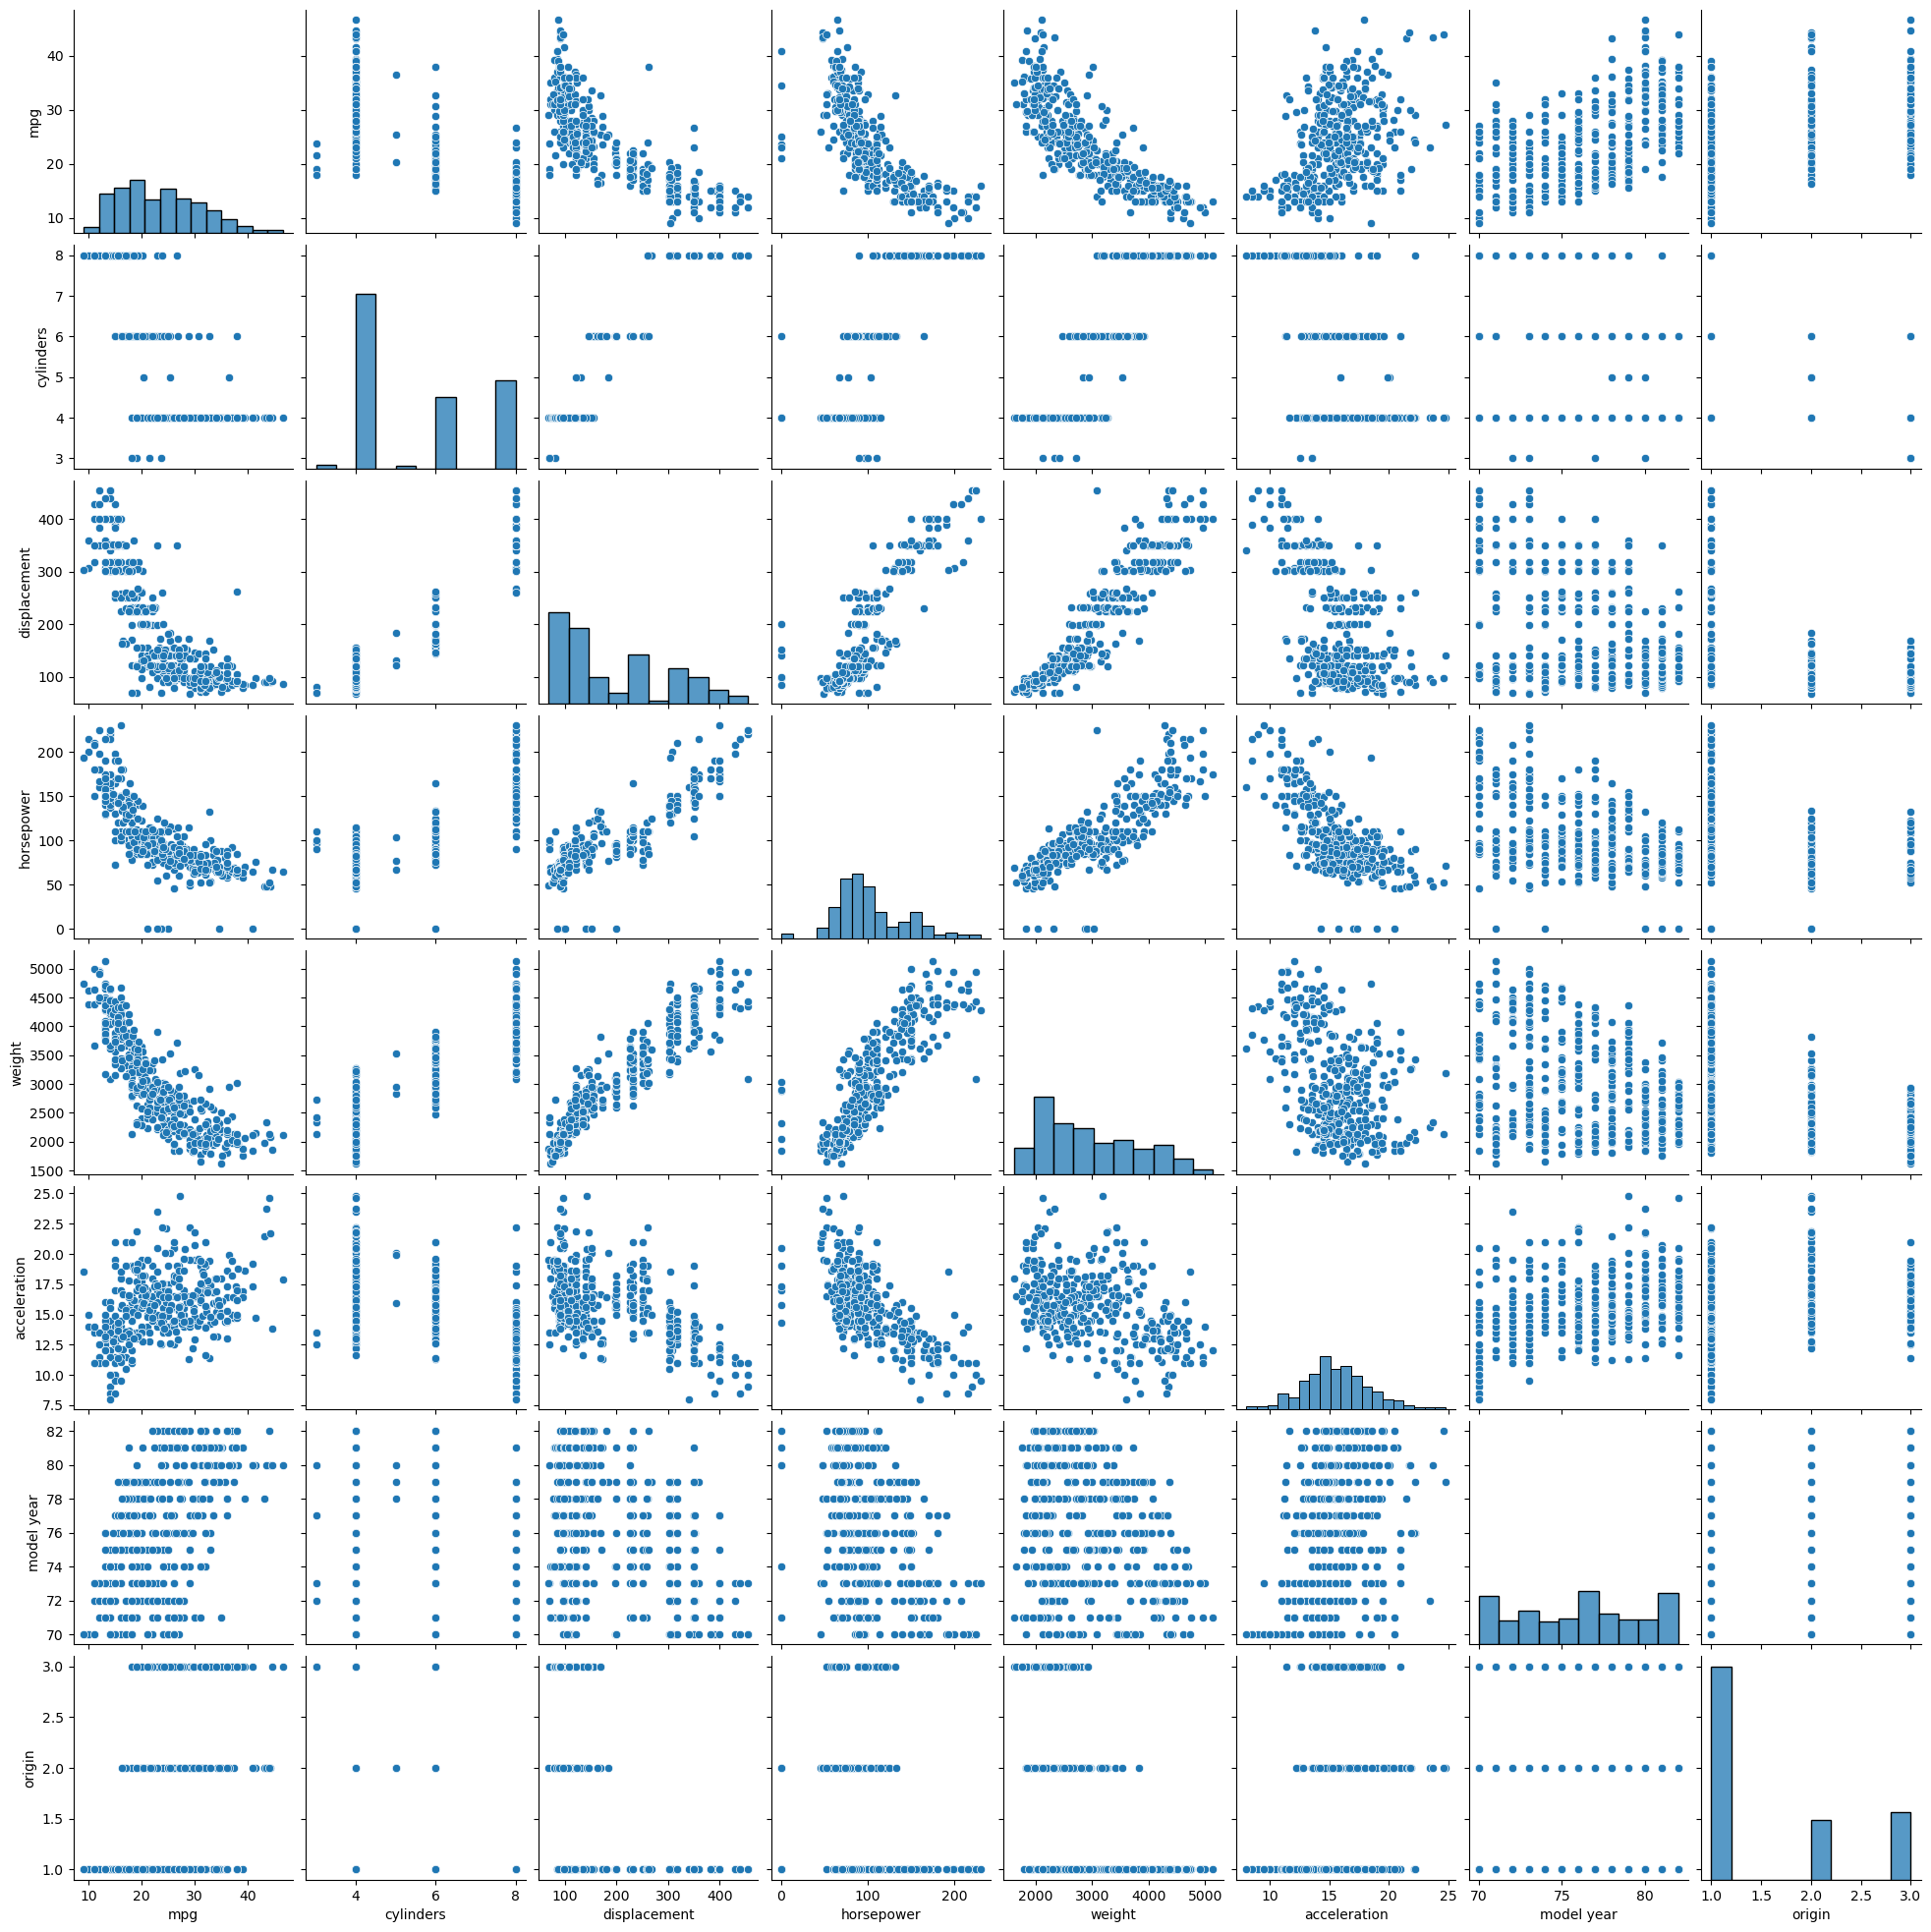

In [73]:
sns.pairplot(df)

In [ ]:
import pickle
